# Courbe d’intensité

Exemple simple : Courbes d’intensités lumineuse au limbe à partir d'images d’un coronographe

In [1]:
import matplotlib.pyplot as plt
import math

import numpy as np

In [2]:
import glob
from module import readFitsBz2
from IPython.display import clear_output

path = 'data/C2/'

hdul = []
counter = 0

files = glob.glob(path + '*_c2_*.fts.bz2')
total = len(files)
for file in files:
    hdul.append(readFitsBz2(file))
    counter+=1
    clear_output(wait=True)
    print(f'{counter}/{total}')

187/187


In [94]:
r = 830
stepSize = math.pi/360.0

circle = []
t0 = 0
t = t0
while t < 2 * math.pi+t0:
    circle.append((round(-r * math.sin(t) + hdul[0].data.shape[0]/2), round(-r * math.cos(t) + hdul[0].data.shape[0]/2)))
    t += stepSize

In [95]:
circle

[(1024, 194),
 (1017, 194),
 (1010, 194),
 (1002, 194),
 (995, 195),
 (988, 195),
 (981, 195),
 (973, 196),
 (966, 196),
 (959, 197),
 (952, 197),
 (944, 198),
 (937, 199),
 (930, 199),
 (923, 200),
 (916, 201),
 (908, 202),
 (901, 203),
 (894, 204),
 (887, 205),
 (880, 207),
 (873, 208),
 (866, 209),
 (859, 211),
 (851, 212),
 (844, 214),
 (837, 215),
 (830, 217),
 (823, 219),
 (816, 220),
 (809, 222),
 (802, 224),
 (795, 226),
 (788, 228),
 (781, 230),
 (774, 232),
 (768, 235),
 (761, 237),
 (754, 239),
 (747, 242),
 (740, 244),
 (733, 247),
 (727, 249),
 (720, 252),
 (713, 254),
 (706, 257),
 (700, 260),
 (693, 263),
 (686, 266),
 (680, 269),
 (673, 272),
 (667, 275),
 (660, 278),
 (654, 281),
 (647, 284),
 (641, 288),
 (634, 291),
 (628, 295),
 (622, 298),
 (615, 302),
 (609, 305),
 (603, 309),
 (597, 313),
 (590, 316),
 (584, 320),
 (578, 324),
 (572, 328),
 (566, 332),
 (560, 336),
 (554, 340),
 (548, 344),
 (542, 348),
 (536, 353),
 (530, 357),
 (524, 361),
 (519, 366),
 (513, 3

In [86]:
coord_x = [x for x,y in circle]
coord_y = [y for x,y in circle]

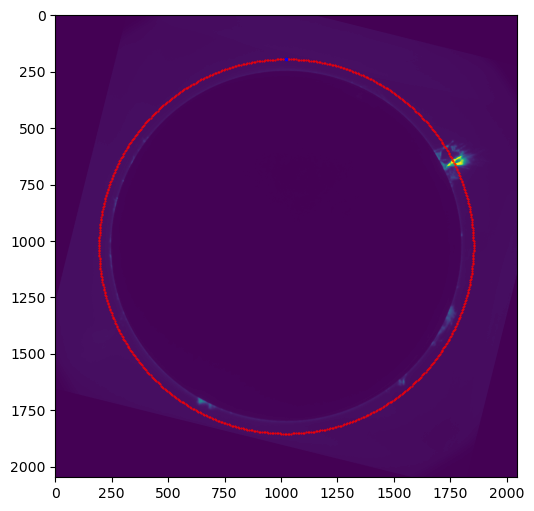

In [100]:
fig, ax = plt.subplots(figsize=(6,6))
plt.imshow(hdul[175].data)
plt.scatter(coord_x, coord_y, marker='.', s=1, c='r');

plt.scatter(1024, 194, marker='.', s=10, c='b');

In [101]:
from datetime import datetime, timedelta

start_time = datetime.strptime(hdul[0].header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")
end_time = datetime.strptime(hdul[-1].header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")

if start_time.second>30:
    start_time = start_time + timedelta(minutes=1)

start_time.replace(second=0)

time_difference = end_time - start_time
end_idx = round(time_difference.total_seconds()/60)

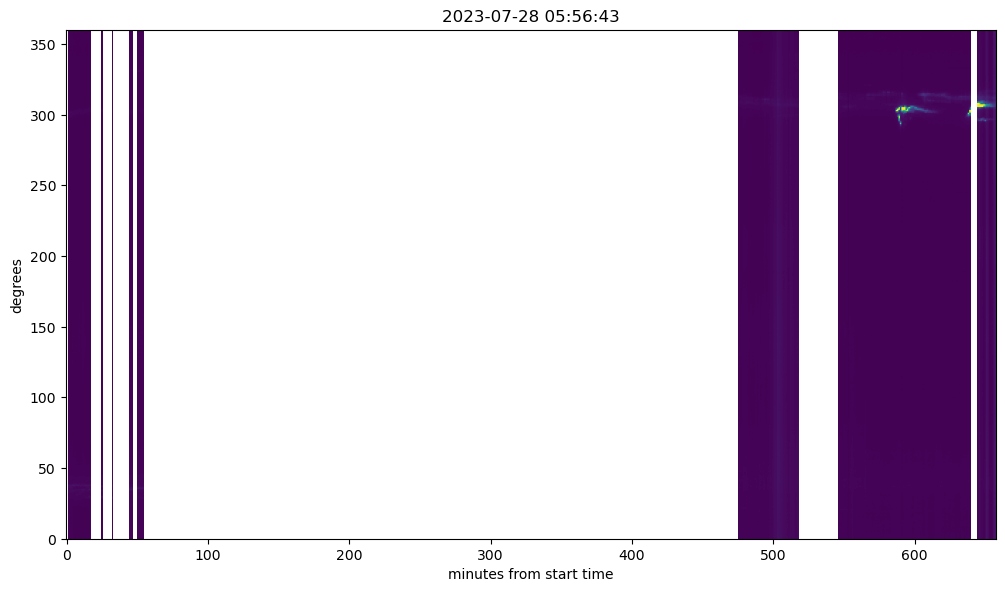

In [107]:
intensities = np.full((720,end_idx+1),np.nan)
for hdu in hdul:    
    time = datetime.strptime(hdu.header['DATE_OBS'], "%Y-%m-%dT%H:%M:%S.%f")
    
    time_difference = time - start_time
    
    idx = round(time_difference.total_seconds()/60)

    intensity = []
    for coord in circle:
        intensity.append(hdu.data[coord])
        
    intensities[:,idx] = intensity

plt.figure(figsize=(12,12))
plt.imshow(intensities, origin='lower');

plt.xlabel('minutes from start time')

plt.ylim(0,360)
plt.ylabel('degrees')



plt.title(start_time);

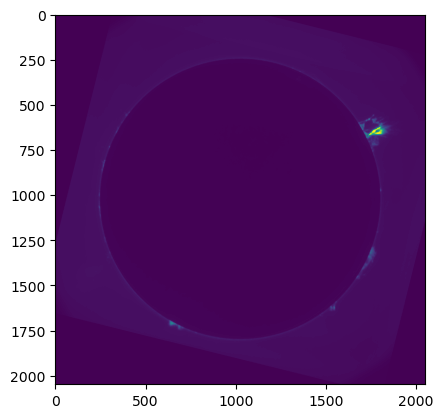

In [103]:
img = np.flip(hdul[175].data)
plt.imshow(hdul[175].data)